In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas.tseries.frequencies import to_offset

# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
# plt.rcParams['text.usetex'] = True
# plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.family'] = "serif"

These data are from the [Mauna Loa Observatory](https://gml.noaa.gov/aftp/data/trace_gases/co2/in-situ/surface/txt/co2_mlo_surface-insitu_1_ccgg_DailyData.txt).

In [2]:
df = pd.read_csv('../data/misc-data/co2_mlo_surface-insitu_1_ccgg_DailyData.txt', 
                 skiprows=158, 
#                  sep='/s', 
                 delimiter=' ',
                 na_values=[-999.99, -99.99],
                 na_filter=True)
columns = ['year', 'month','day', 'hour', 'minute', 'second']
df['timestamp'] = pd.to_datetime(df[columns])
df.set_index('timestamp', inplace=True)
df.drop(columns=columns, inplace=True)
df

,site_code,datetime,time_decimal,midpoint_time,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,qcflag
timestamp,,,,,,,,,,,,,
1973-07-24,MLO,1973-07-24T00:00:00Z,1973.558904,112363200,NaN,NaN,0,19.536,-155.576,3422.0,3397.0,25.0,*..
1973-07-25,MLO,1973-07-25T00:00:00Z,1973.561644,112449600,NaN,NaN,0,19.536,-155.576,3422.0,3397.0,25.0,*..
1973-07-26,MLO,1973-07-26T00:00:00Z,1973.564384,112536000,NaN,NaN,0,19.536,-155.576,3422.0,3397.0,25.0,*..
1973-07-27,MLO,1973-07-27T00:00:00Z,1973.567123,112622400,NaN,NaN,0,19.536,-155.576,3422.0,3397.0,25.0,*..
1973-07-28,MLO,1973-07-28T00:00:00Z,1973.569863,112708800,NaN,NaN,0,19.536,-155.576,3422.0,3397.0,25.0,*..
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,MLO,2022-12-27T00:00:00Z,2022.986301,1672142400,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,-9.9,*..
2022-12-28,MLO,2022-12-28T00:00:00Z,2022.989041,1672228800,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,-9.9,*..
2022-12-29,MLO,2022-12-29T00:00:00Z,2022.991781,1672315200,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,-9.9,*..


In [3]:
df.isnull().sum()

site_code           0
datetime            0
time_decimal        0
midpoint_time       0
value            3138
value_std_dev    3138
nvalue              0
latitude            0
longitude           0
altitude            0
elevation           0
intake_height       0
qcflag              0
dtype: int64

In [4]:
df[df.value.isnull()]

,site_code,datetime,time_decimal,midpoint_time,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,qcflag
timestamp,,,,,,,,,,,,,
1973-07-24,MLO,1973-07-24T00:00:00Z,1973.558904,112363200,NaN,NaN,0,19.536,-155.576,3422.0,3397.0,25.0,*..
1973-07-25,MLO,1973-07-25T00:00:00Z,1973.561644,112449600,NaN,NaN,0,19.536,-155.576,3422.0,3397.0,25.0,*..
1973-07-26,MLO,1973-07-26T00:00:00Z,1973.564384,112536000,NaN,NaN,0,19.536,-155.576,3422.0,3397.0,25.0,*..
1973-07-27,MLO,1973-07-27T00:00:00Z,1973.567123,112622400,NaN,NaN,0,19.536,-155.576,3422.0,3397.0,25.0,*..
1973-07-28,MLO,1973-07-28T00:00:00Z,1973.569863,112708800,NaN,NaN,0,19.536,-155.576,3422.0,3397.0,25.0,*..
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,MLO,2022-12-27T00:00:00Z,2022.986301,1672142400,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,-9.9,*..
2022-12-28,MLO,2022-12-28T00:00:00Z,2022.989041,1672228800,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,-9.9,*..
2022-12-29,MLO,2022-12-29T00:00:00Z,2022.991781,1672315200,NaN,NaN,0,19.536,-155.576,3387.1,3397.0,-9.9,*..


In [5]:
df.dropna(inplace=True)
df.isnull().sum()

site_code        0
datetime         0
time_decimal     0
midpoint_time    0
value            0
value_std_dev    0
nvalue           0
latitude         0
longitude        0
altitude         0
elevation        0
intake_height    0
qcflag           0
dtype: int64

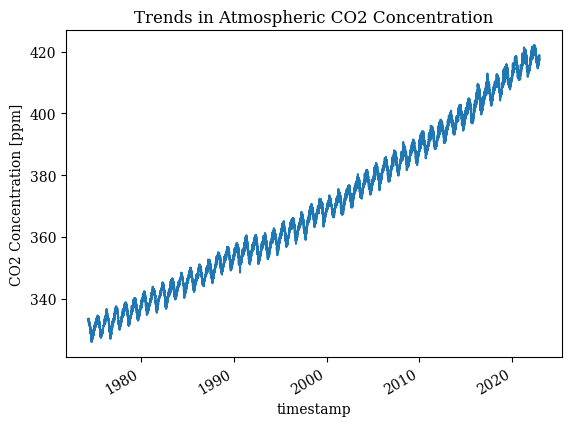

In [6]:
ax = df.value.plot()
ax.set_ylabel('CO2 Concentration [ppm]')
ax.set_title('Trends in Atmospheric CO2 Concentration')
plt.show()

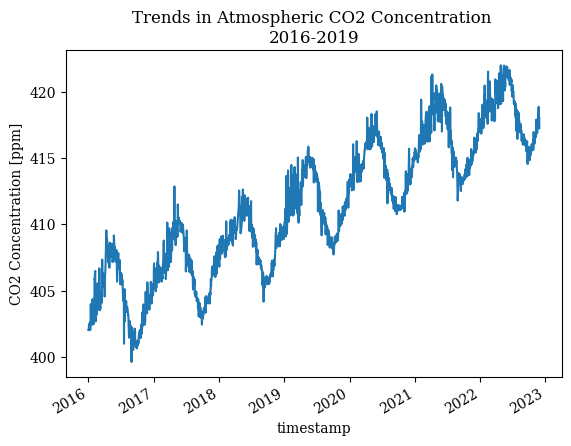

In [7]:
ax = df[df.index.year >= 2016].value.plot()
ax.set_ylabel('CO2 Concentration [ppm]')
ax.set_title('Trends in Atmospheric CO2 Concentration \n2016-2019')
plt.show()

/var/folders/6h/g412p7x53jbcqr_x5sy9z8th0000gn/T/ipykernel_9786/4091593723.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monC = df.resample('M', offset='14D').mean()


<Axes: xlabel='timestamp'>

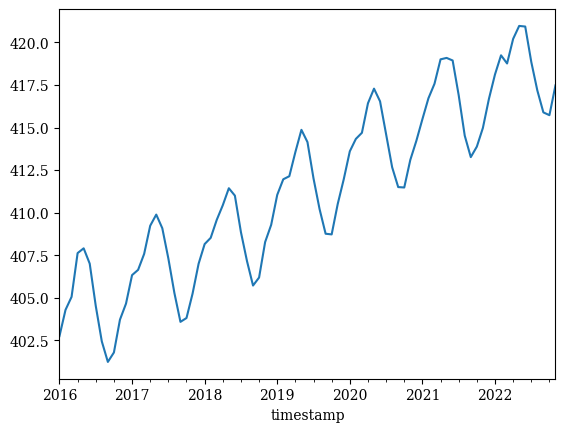

In [8]:
df_monC = df.resample('M', offset='14D').mean()
df_monC[df_monC.index.year>=2016].value.plot()

<Axes: xlabel='timestamp'>

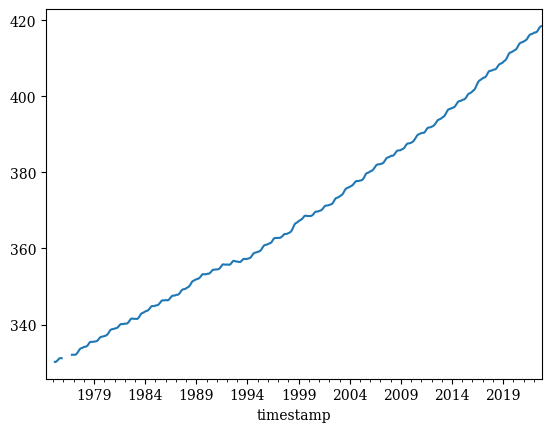

In [9]:
df_smooth = df_monC.rolling(11).mean()
df_smooth.value.plot()

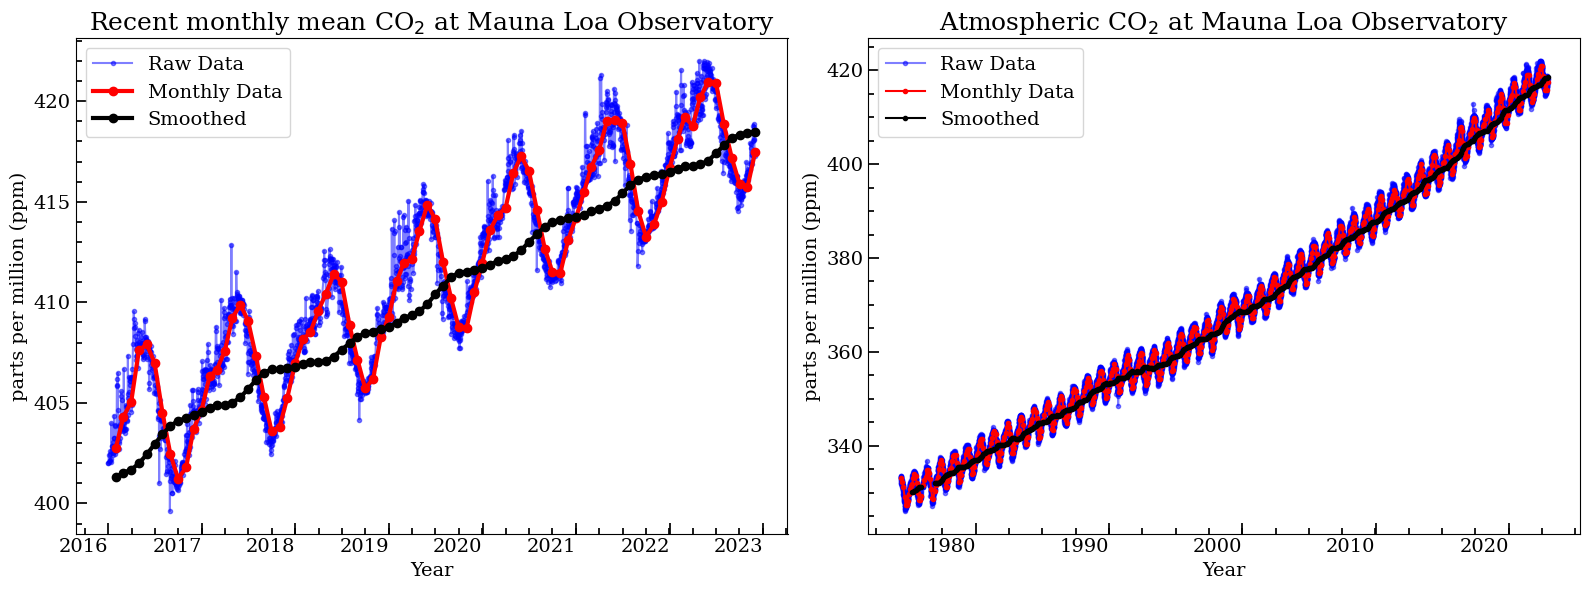

In [10]:
import matplotlib.dates as mdates

fig, axes = plt.subplots(1,2,figsize=(16,6))

df.value.plot(ax=axes[1], label='Raw Data', color='b', marker='.', alpha=0.5)
df_monC.value.plot(ax=axes[1], label='Monthly Data', marker='.', color='r')
df_smooth.value.plot(ax=axes[1], label='Smoothed', marker='.', color='k')
axes[1].legend(fontsize=14)

df[df.index.year>=2016].value.plot(ax=axes[0], label='Raw Data', color='b', 
                                   marker='.', alpha=0.5)
df_monC[df_monC.index.year>=2016].value.plot(ax=axes[0], label='Monthly Data', 
                                             marker='o', color='r', lw=3)
df_smooth[df_smooth.index.year>=2016].value.plot(ax=axes[0], label='Smoothed', 
                                                 marker='o', color='k', lw=3)

axes[0].legend(fontsize=14)
axes[0].minorticks_on()
axes[1].minorticks_on()
axes[0].xaxis.set_major_locator(mdates.YearLocator())
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0].tick_params(axis='both',which='both',direction='in',rotation=0, 
                    labelsize=14, width=1.25)
axes[0].tick_params(axis='both',which='minor',length=4)
axes[0].tick_params(axis='both',which='major',length=8)
axes[1].tick_params(axis='both',which='both',direction='in',rotation=0, 
                    labelsize=14, width=1.25)
axes[1].tick_params(axis='both',which='minor',length=4)
axes[1].tick_params(axis='both',which='major',length=8)

axes[0].set_ylabel('parts per million (ppm)', fontsize=14)
axes[1].set_ylabel('parts per million (ppm)',fontsize=14)

axes[0].set_xlabel('Year', fontsize=14)
axes[1].set_xlabel('Year', fontsize=14)


axes[0].set_title('Recent monthly mean CO$_2$ at Mauna Loa Observatory', fontsize=18)
axes[1].set_title('Atmospheric CO$_2$ at Mauna Loa Observatory', fontsize=18)
# axes[0].set_ylim(399,421)
plt.tight_layout()

In [14]:
df[df.index.year==start_year].value.min()

399.62

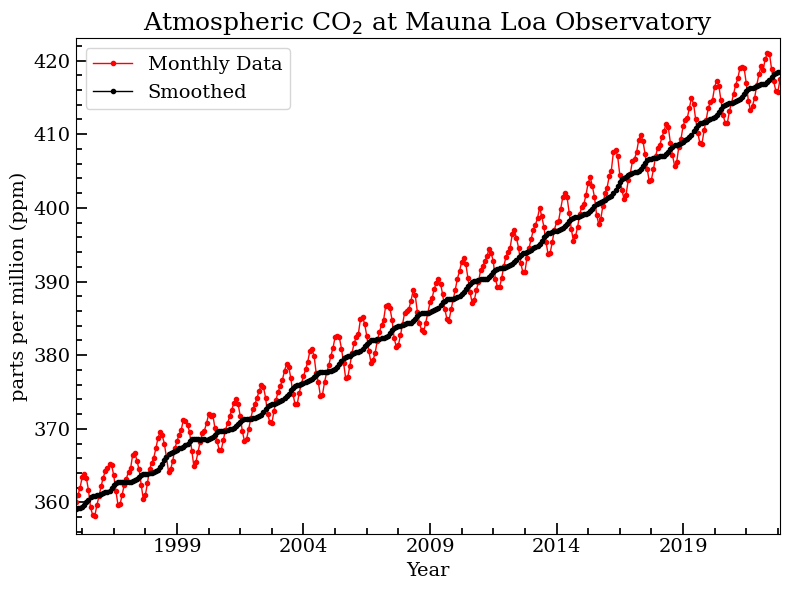

In [26]:
import matplotlib.dates as mdates

fig, axes = plt.subplots(1,1,figsize=(8,6))

start_year = 1995

# df.value.plot(ax=axes, label='Raw Data', color='b', marker='.', alpha=0.5)
# df_monC.value.plot(ax=axes, label='Monthly Data', marker='.', color='r')
# df_smooth.value.plot(ax=axes, label='Smoothed', marker='.', color='k')

# df[df.index.year>=start_year].value.plot(ax=axes, label='Raw Data', color='b', 
#                                    marker='.', alpha=0.5)
df_monC[df_monC.index.year>=start_year].value.plot(ax=axes, label='Monthly Data', 
                                             marker='.', color='r', lw=1)
df_smooth[df_smooth.index.year>=start_year].value.plot(ax=axes, label='Smoothed', 
                                                 marker='.', color='k', lw=1)


axes.legend(fontsize=14)



axes.minorticks_on()

axes.tick_params(axis='both',which='both',direction='in',rotation=0, 
                    labelsize=14, width=1.25)
axes.tick_params(axis='both',which='minor',length=4)
axes.tick_params(axis='both',which='major',length=8)

axes.set_ylabel('parts per million (ppm)',fontsize=14)

axes.set_xlabel('Year', fontsize=14)


axes.set_title('Atmospheric CO$_2$ at Mauna Loa Observatory', fontsize=18)

co2_min = df[df.index.year==start_year].value.min()
co2_max = df[df.index.year==2022].value.max()
axes.set_ylim(co2_min-1, co2_max+1)
# axes.set_xlim('01-01-2010', '010')
plt.tight_layout()
plt.savefig("../docs/figures/mauna-loa-co2.pgf")